# Caminho mais seguro (_Least Dangerous Path_)
Introdução a Otimização (COM361)

Professor Amit Bhaya 
2022.2

Henrique Marques Lozano (henriquemarques@poli.ufrj.br), Matheus Gomes Rocha (matheusxvtb@poli.ufrj.br)


### Índice

1. Introdução
2. Modelo Matemático
3. Solução
4. Resultados e Discussão
5. Desenvolvimento
6. Conclusão
7. Referências bibliográficas

## 1. Introdução 
Acidentes em rotas sem segurança apropriada são cada vez mais frequentes. Apesar do aumento de veículos ativos seja um fator claro do aumento de acidentes, outros fatores devem ser considerados para realmente reduzir esse fenômeno. [Caminhos de terra](https://www.roadandtrack.com/news/a41300347/father-killed-in-off-road-recovery-accident/), terrenos irregulares, [climas não favoraveis ](https://www.cbsnews.com/colorado/news/colorado-4x4-rescue-recovery-team-spokesman-explains-emergency-situations-during-blizzards/) valas, [penhascos](https://www.independent.co.uk/news/world/americas/jeep-accident-kills-group-colorado-b2168987.html) entre outros são perigos para aqueles que percorrem esses, ainda que o numero de veículos diminua. O problema deste tipo de trajeto é que ainda que haja orçamento ou incentivo para tornar esses caminhos mais seguros, há casos que não seria possível. Isso pede outro tipo de solução.

Os acidentes em rotas inóspitas são ignorados por conta da sua complexidade. Qualquer terreno que um veículo possa percorrer é um trajeto possível para ele, sem mencionar que trajetos podem aparecer ou desaparecer dependendo do clima e outros fenômenos imprevisíveis. A capacidade de poder planejar de forma eficiente e rápida uma rota segura torna-se uma opção interessante para poder dinamicamente determinar o melhor trajeto para um determinado terreno e destino. Acidentes em terrenos _off-road_ não são incomuns, por isso, um meio de evitar eles é fundamental.

Trajetos seguros são possíveis para grande parte dos terrenos. Os perigos de relevos irregulares não pavimentados apresentam o caso mais simples e previsível deste tipo de problema. Por isso propomos criar um algoritmo que consiga traçar rotas seguras e eficientes independentes desse fator. Com “seguro” queremos dizer a menor mudança em energia potencial viável, porque tal é uma métrica clara de como a energia potencial do veículo é alterada na travessia de um determinado terreno. Desejamos que ele possa discernir caminhos impróprios para um veículo atravessar eles, sejam eles altos ou baixos. Para isso vamos visar a redução da diferença de altura em cada momento da viagem.

Consideramos terrenos simples inicialmente. Apenas um morro e um veículo com propriedades desprezíveis são suficientes para comprovar a tese.

## 2. Modelo matemático

O modelo considera um objeto puntiforme capaz de deslocar se em um plano bidimensional sem atrito e sujeito a diferenças na altura, definidos pela função do relevo.

$$
h:\mathbb{R}^2 \rightarrow \mathbb{R}
$$

Podemos criar um simples morro da seguinte forma.

$$
h(x,y) = e^{-(x^2+y^2)}
$$

<p align="center">
  <img src="assets/to_readme/Terreno_qualquer.png">
</p>

Definimos a posição, velocidade e impulso em duas dimensões do objeto – _position_, _speed_ e _thrust_ em inglês. A velocidade é zero sempre no começo do trajeto e pode-se definir qualquer ponto inicial em coordenadas cartesianas.
$$
p = position = (p_x,p_y) \\

s = speed = (s_x,s_y) \\

u = thrust = (u_x,u_y)
$$

A velocidade e impulso devem ser menores que 0.5 em módulo.

A cada instante no tempo, a posição, velocidade e impulso são atualizados e tais segue o seguinte sistema de equações.

$$
\begin{cases}
p(t+1) = p(t) + s(t) \\ 
s(t+1) = s(t) + u(t) + h(t+1) - h(t)
\end{cases}
$$

A altura influencia linearmente a velocidade do objeto.
Todos os destinos devem ser atingidos.

$$
\overline p_i = w_i \quad \forall i
$$


Finalmente, a função objetivo é definida pela soma de três objetivos: o alcance de determinados destinos (tal que $w$ são os destinos e $\overline p$ é a posição mais próxima do destino), a redução do risco e a redução do impulso.

$$
\delta \cdot \sum_{t=1}^{W}(\overline p - w)^2 + \xi \cdot \sum_{t=1}^{T-1}(h(t+1) - h(t))^2 + \lambda \cdot \sum_{t=1}^{T}(u(t))^2
$$

Note que $W$ é o número total de destinos e $T$ o número de instantes.

Os parâmetros $\xi$, $\delta$ e $\lambda$ podem ser ajustados para priorizar diferentes objetivos.


\begin{align}
& \text{minimize}& \delta \cdot \sum_{i=1}^{W}(\overline p_i - w_i)^2 + \xi \cdot \sum_{t=1}^{T-1}(h(t+1) - h(t))^2 + \lambda \cdot \sum_{t=1}^{T}(u(t))^2 & \quad \\
& \text{sujeito a} &  |s(1)| \leq (0,0) & \quad \\
&  &  |s(t)| \leq (0.5,0.5) & \quad \forall t\\
&  &  |u(t)| \leq (0.5,0.5) & \quad \forall t\\
&  &  h(t) = \text{basicTerrain}(p(t)) & \quad \forall t \\ 
&  &  p(t+1) = p(t) + s(t) & \quad \forall t \\ 
&  &  s(t+1) = s(t) + u(t) + h(t+1) - h(t) & \quad \forall t \\
&  &  \overline p_i = w_i & \quad \forall i \\
&  &  p,s,u, w_i, p_i \in \mathbb{R}^2 \ \forall t \ \forall i \quad h \in \mathbb{R} \ \forall t
\end{align}

## 3. Solução ##



### 3.1 Condições iniciais



In [7]:
using JuMP, Ipopt

# Terrain function
basicTerrain(x, y) = exp(-1(x^2 + y^2)) + exp(-0.5((x-2)^2 + y^2)) 

# Discrete time
W = 4
instances = zeros(Int,4)  
waypoints = zeros(2,W)    

instances[1] = 1
instances[2] = 30
instances[3] = 70
instances[4] = 100

# Define waypoints
waypoints = [-2 -2;
        0  0;
        1  0;
       -2 -2]

println("Condições estabelecidas!")

Condições estabelecidas!


### 3.2 Modelo de otimização

In [8]:
function least_dangerous(λ, ξ, δ) 

    m = Model(Ipopt.Optimizer)
    register(m, :basicTerrain, 2, basicTerrain, autodiff=true)
    register(m, :sum, 1, sum; autodiff = true)
    set_optimizer_attributes(m, "print_level" => 0 )
    @variable(m, position[1:instances[W], 1:2]) # Position
    @variable(m, speed[1:instances[W], 1:2])    # Velocity
    @variable(m, thrust[1:instances[W], 1:2])   # Thrust
    @variable(m, height[1:instances[W], 1:1])   # Height

    # Initial speed
    @constraint(m, speed[1,:] .== [0 0])

    # Speed and thrust hard caps
    @constraint(m, [-0.5 -0.5] .<= speed .<= [0.5 0.5])
    @constraint(m, [-0.5 -0.5] .<= thrust .<= [0.5 0.5])

    for t in 1:instances[W]-1
        # Height update
        @NLconstraint(m, height[t,:1] == basicTerrain(position[t,:]...))

        # Height diference cap
        #@constraint(m, -0.05 <= height[t+1,:1] - height[t,:1] <= 0.05)
        
        # Dynamics
        @constraint(m, position[t+1,:] .== position[t,:] + speed[t,:])
        @NLconstraint(m, speed[t+1,:1] == speed[t,:1] + thrust[t,:1] + height[t+1,:1] - height[t,:1])
        @NLconstraint(m, speed[t+1,:2] == speed[t,:2] + thrust[t,:2] + height[t+1,:1] - height[t,:1])
    end

    # Reach all waypoints
    for i in [1 W]
        @constraint(m, position[instances[i],:] .== waypoints[i,:])
    end

    @objective(m, Min, δ * sum((position[instances[2:W],:] - waypoints[2:W,:]).^2) + ξ * sum((height[2:W,1] - height[1:W-1,1]).^2) + λ * sum(thrust.^2))
    optimize!(m)
    
    speed = value.(speed)
    thrust = value.(thrust)
    path = value.(position)
    height = value.(height)
    
    return (speed,thrust,path,height)
end

println("Modelo declarado!")

Modelo declarado!


### 3.3 Simulação

In [13]:
λ = 1     # Reach waypoint
ξ = 10    # Reduce risk
δ = 5     # Reduce thrust
(speed, thrust, path, height) = least_dangerous(λ, ξ, δ)
println("Simulação concluída!")

Simulação concluída!


## 4. Resultados e discussão

É possível gerar uma matriz de conexões a partir do terreno discretizado na qual é possível aplicar o algoritmo de Dijkstra, ajustado para atingir o caminho mais seguro. 

### 4.1 Sr. Gato & Sr. Rato

Segue um problema lúdico para compreender a solução. Considere que um gato localizado em A deseja chegar até um rato no nó C. O gato pode escolher um de dois caminhos, um ABC no qual o custo entre A e B é 2 e entre B e C 1, ou por ADEC que cada aresta tem custo 1. Ambos caminhos totalizam em 3, contudo a segunda opção é mais “segura” pois apresenta menor diferença de energia potencial para o gato. 

Também pode-se entender que caso o gato tome o segundo caminho, ele tem um risco menor de se machucar caso caia.


Acima, podemos confirmar que está de fato funcional! o carrinho sai do ponto de origem em (-2, -2) vai até o ponto (0, 0) utilizando o impulso, desce o cume sem utilizar o impulso, aproveita a carga de energia potencial e vai ate os outros pontos! e retorna para o ponto de origem.

### 4.2 Caminho resultante

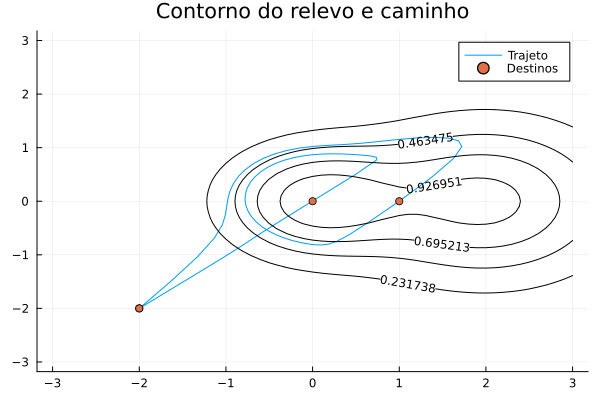

In [16]:
using Plots

plot(path[:,1], path[:,2], label="Trajeto")
scatter!(waypoints[:,1], waypoints[:,2], label="Destinos")
contour!(-3:0.1:3, -3:0.1:3, basicTerrain, color=:black, clabels=true, levels=4, cbar=false, title="Contorno do relevo e caminho")

### 4.3 Gráfico da velocidade, impulso, caminho e altura

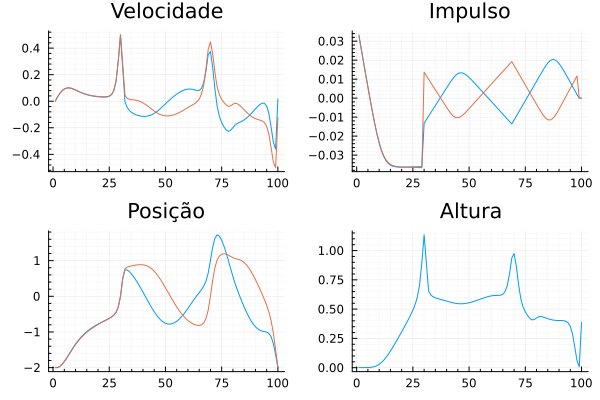

In [15]:
# Plot of the properties
p1 = plot(speed, title="Velocidade")
p2 = plot(thrust, title="Impulso")
p3 = plot(path, title="Posição")
p4 = plot(height, title="Altura")

plot!(p1, p2, p3, p4, layout=(2, 2), legend=false, minorgrid=true)

### 4.4 Módulo do impulso total para cada instante de tempo

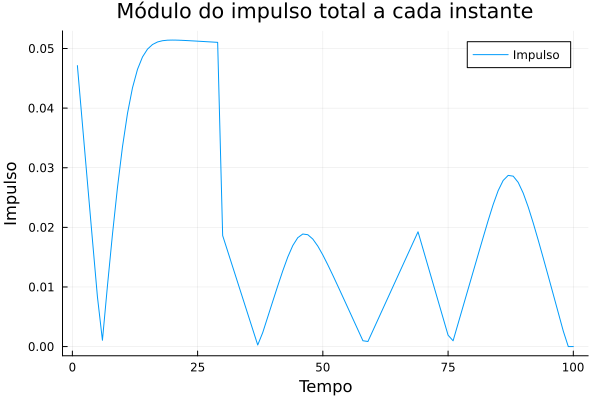

In [12]:
# Module of the total impulse at each instant
plot(sqrt.(thrust[:,1].^2  + thrust[:,1].^2), 
  label="Impulso", 
  title="Módulo do impulso total a cada instante", 
  xlabel="Tempo", 
  ylabel="Impulso")

## 5. Desenvolvimento

Inicialmente pesquisamos diversas formas de encontrar esse suposto caminho. Estudamos o paper [Finding Optimal-Path Maps for Path Planning across Weighted Regions](https://journals.sagepub.com/doi/pdf/10.1177/02783640022066761) o qual dissertativa sobre a possibilidade de encontrar caminhos eficientes pela segmentação do terreno em superfícies equipotenciais…

Desta forma, percorremos o trajeto formulado pela hipótese. Desenvolvemos algoritmos para gerar terrenos simples por meio de funções exponenciais que mapeiam $\mathbb{R}^2$ em $\mathbb{R}$– ou coordenadas $(x,y)$ em $z$. Partimos para a discretização do relevo, porque intuímos que trabalhar com graphos seria mais simples, intuitivo e eficiente do que trabalhar o terreno contínuo Nesse terreno permitimos o deslocamento vertical e horizontal, tal como em uma malha quadrada. Finalmente construímos o script que procura o caminho mais curto entre dois pontos quaisquer do terreno discreto.

Após alguns testes, os resultados demonstraram que a discretização não era apropriada para nossa proposta. Trabalhar no terreno discreto perdia as nuances do terreno, o que escondia caminhos viáveis e desejáveis. Sem mencionar a demora no processamento do algoritmo, trabalhar com 25 pontos entre $(-1,-1)$ e $(1,1)$ demorava cerca de 1 minuto, pontos e 49 demorava aproximadamente 3 minutos.

Com essa dificuldade em mente, desenvolvemos o modelo em cima do terreno contínuo. Tal permitiu uma solução mais apropriada do problema em mãos, aplicando propriedades físicas como base das restrições.


## 6. Conclusão ##

Em suma, para o nosso projeto, existem diversas formas e maneiras de se resolver o problema proposto, por exemplo o algoritmo de Dijkstra que busca identificar a partir do nó de origem qual vai ser o caminho menos custoso entre ele e todos os outros do grafo.

A principal dificuldade encontrada no algoritmo de Dijkstra foi que o algoritmo não era apropriado por conta do seu alto tempo de processamento, por isso a utilização do fluxo por custo mínimo foi a mais viável. O cerne principal do projeto era criar um programa que consiga processar e traçar trajetos que possuem a menor mudança de altura. Conseguimos atingir esse objetivo por meio do modelo contínuo. Tal modelo também permitiu ter um modelo mais fiel à realidade, na qual energia potencial e impulso são fatores relevantes na escolha de um caminho assim na vida real.

Não obstante, conseguimos otimizar a utilização mínima de impulso necessária para terminar o trajeto proposto no menor caminho possível, com as determinadas restrições, tanto lineares quanto não lineares na velocidade e impulso.

O nosso projeto foi um caso específico do problema de fluxo em rede de custo mínimo em adição a um de regularizacao – por conta dos múltiplos objetivos. Nosso problema se enquadra em um de programação linear com objetivos não lineares, ainda que uma das restrições seja não linear, isso se deve a uma tecnalidade do uso do pacote JuMP.

Empregamos o solver Ipopt para prover as ferramentas necessárias para resolver o problema e ser acessível.

Um desenvolvimento futuro para o andamento do projeto seria um melhor processamento de identificação e planejamento de rotas para terrenos descontínuos e mais irregulares, algumas sugestões são: côncavos, piramidais, em formato de sela, ou com um precipício no meio do percurso. Também pode-se visar um melhor manuseamento dos recursos.	


## 7. Referências bibliográficas ##

[1]  One Step! Code, "Shortest path in Python (Breadth first search)" onestepcode.com/graph-shortest-path-python/.

[2] Bazaraa, M.S., Jarvis, J.J. and Sherali, H.D., 2011. Linear programming and network flows. John Wiley & Sons.

[3] Ahuja, R.K., Magnanti, T.L. and Orlin, J.B., 1993. Network flows: Theory, algorithms, and applications. Prentice Hall.

[4] Changhyun Kwon, "Julia Programming for Operations Research 2/e" "Chapter 6
Network Optimization Problems", "6.1 The Minimal-Cost Network-Flow Problem" juliabook.chkwon.net/book/network.

[5] Professor Volmir Eugênio Wilhelm, "Problema do Caminho Mínimo
Shortest Path Problem" docs.ufpr.br/~volmir/PO_II_10_caminho_minimo.pdf.

[6] Ashwani Rathee, (25/09/2021), "Dijkstra's Algorithm in Julia" dev.to/ashwanirathee/dijkstras-algorithm-in-julia-46ih.

[7] "Problema de Fluxo
de Custo Mínimo" (2010), ufjf.br/epd015/files/2010/06/fluxo_custo_minimo2.pdf.

[8] Y. Koren, Senior Member, IEEE and J. Borenstein, Member, IEEE, The University of Michigan, Ann Arbor, California, April 7-12, 1991, pp. 1398-1404, "Potential Field Methods and Their Inherent Limitations for Mobile Robot Navigation"

[9] Lei Tang! ,Songyi Dian!- Gangxu Gu2, Kunli Zhou!,Suihe Wang!, Xinghuan Feng3
School of Electrical Engineering and Information Technology!, School of Physics2, School of Computer3, Sichuan University, Chengdu, China "A Novel Potential Field Method for Obstacle Avoidance and Path Planning of Mobile Robot"

[10] Seyyed Mohammad Hosseini Rostami1m, Arun Kumar Sangaiah2, Jin Wang3* and Xiaozhu Liu4,(2019) "Obstacle avoidance of mobile robots using
modified artificial potential field algorithm"

## 8. Contribuições da dupla:
- Criação e formulação do código do do veículo - Henrique
- Formulação matemática - Henrique
- Conteudo e apresentações escritas e gráficas - Matheus & Matheus
- Pesquisa e inspiração - Matheus
- Colaboração para o desenvolvimento do vídeo - Henrique & Matheus

